# Part1: Exploratory Data Analysis(EDA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set(font_scale=2) 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv('../input/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

How many Survived??

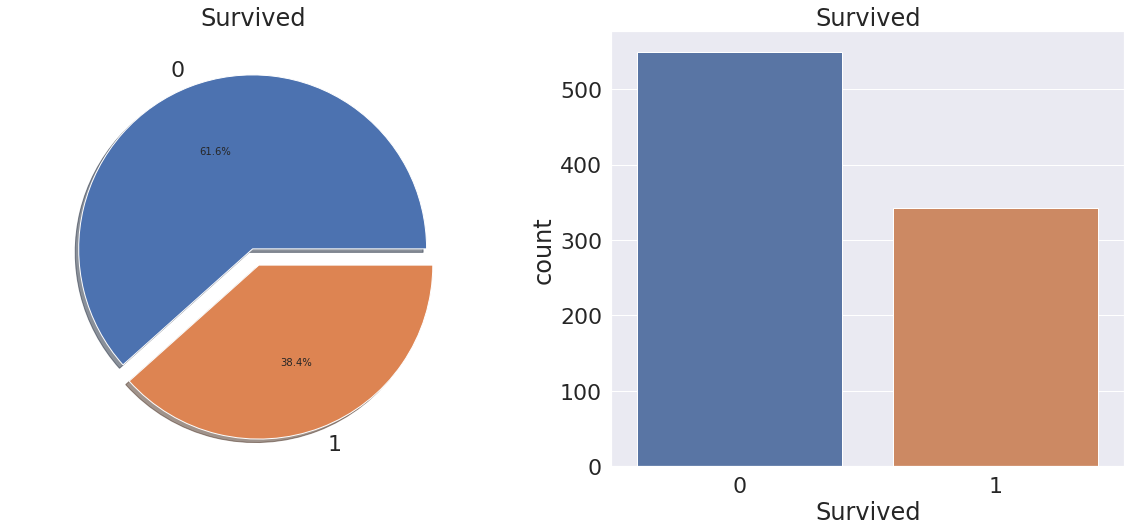

In [6]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel(' ')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## Analysing The Features

### Sex--> Categorical Feature

In [7]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

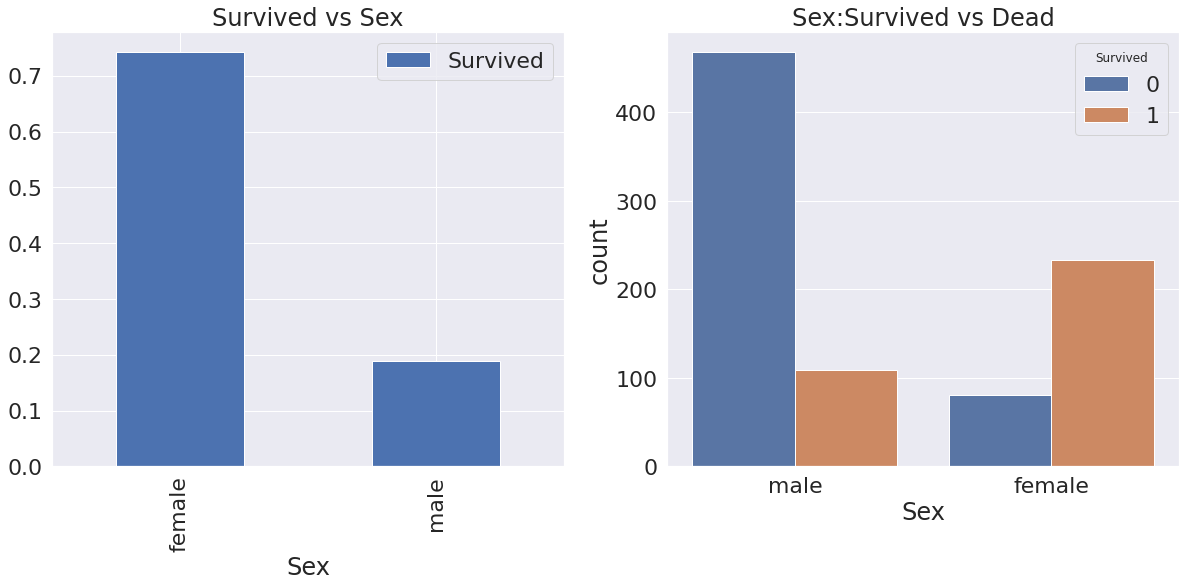

In [8]:
f, ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

여자가 생존률이 더 높은 모습을 볼 수 있다

### Pclass --> Ordinal Feature

In [9]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


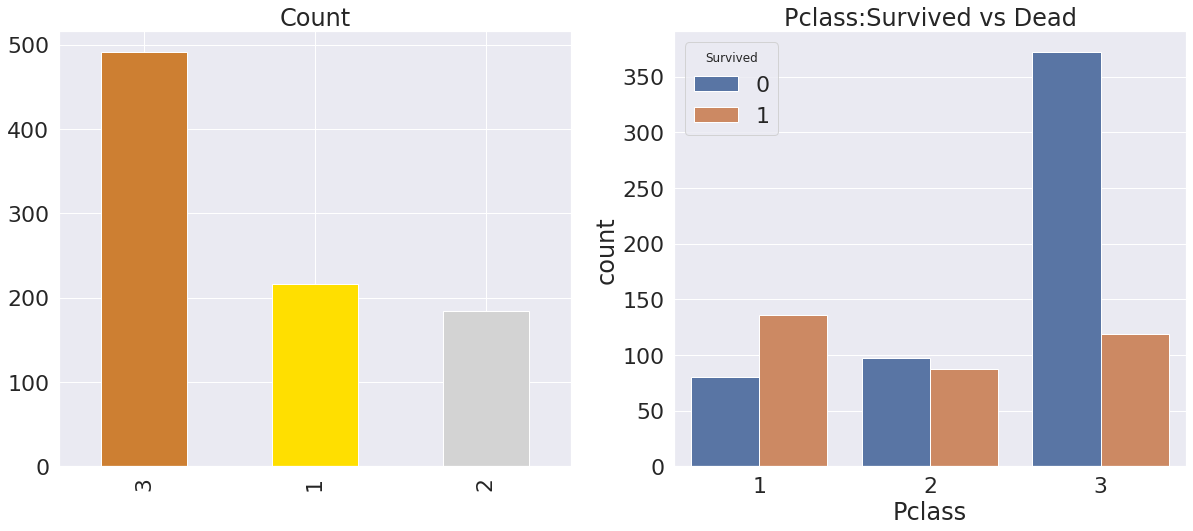

In [10]:
f, ax=plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_title('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

사람들은 돈으로 모든것을 살 수 없다고 말합니다.  
하지만 가장 높은 등급인 1등급 클래스의 생존률이 더 높은 모습을 보입니다.  

In [11]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

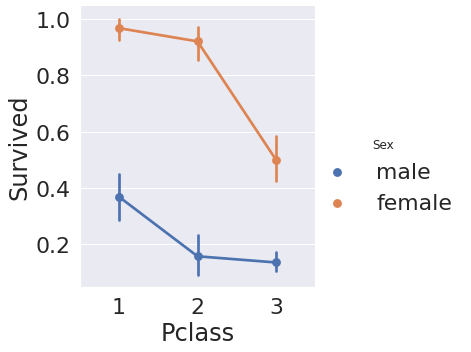

In [12]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

위에서 FactorPlt을 사용했다. 그 이유는 범주형 데이터를 잘 구분 할 수 있기 때문이다. 

In [13]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


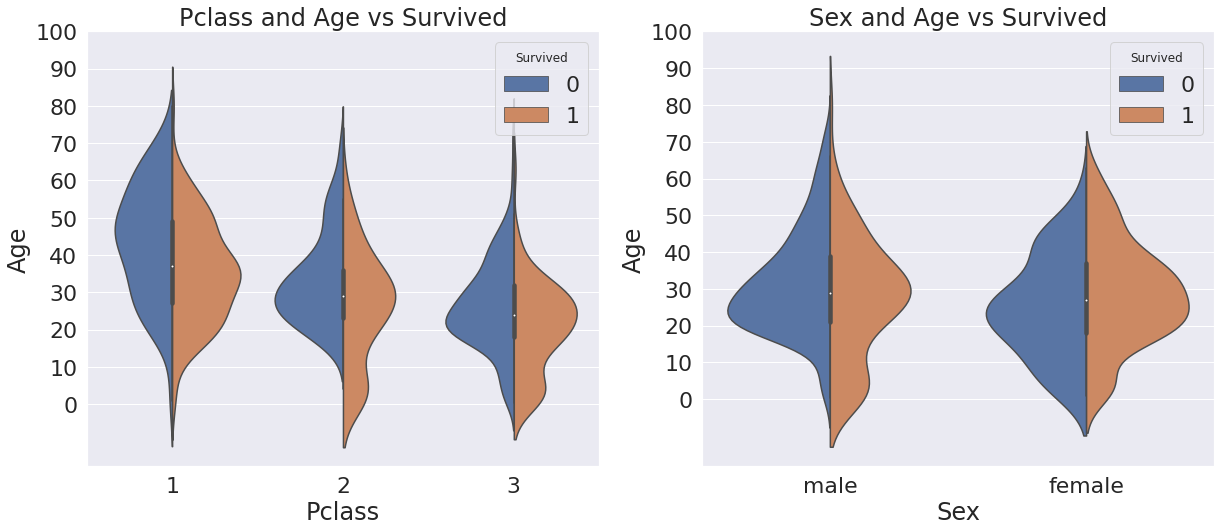

In [14]:
f,ax=plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot("Pclass", "Age", hue="Survived",data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

**분석결과**  
1) Pclass에 따라 어린이의 수가 증가하고 10 세 미만의 행인 (즉, 어린이)의 
생존율은 Pclass에 관계없이 양호 해 보입니다.   

2) Pclass1의 20-50 세 Passenegers의 생존 가능성은 높고 여성에게 더 좋습니다.  

3) 남성의 경우 연령이 증가함에 따라 생존 확률이 감소합니다.  

우리는 앞서 Age의 칼럼에 177명의 NaN(결측)값이 있음을 확인했습니다.  
하지만 임의로 NaN의 값을 채우기엔 연령이 너무 다양합니다.  
그렇다면 우리는 어떻게 결측값을 채울 수 있을 까요?  
바로 이름 앞의 Ms, Mss, Mr를 이용하는 것입니다.  
한국에는 없지만, 외국에는 이런 특징 덕분에 그나마 나이를 예측할 수 있습니다.  
다시 말해, 더욱 신빙성 있는 데이터로 만들 수 있는 것입니다.

In [15]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [16]:
data['Initial'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Initial, dtype: object

In [17]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


그래프를 보니까 대충 Master, Miss, Mr, Mrs가 많이 보이는 군요.  
여기서는 Other을 추가해서 총 5가지 카테고리로 나눈것으로 보입니다.  
Master은 8세 미만의 사람을 지칭하는 initial이라고 하는 군요.  

In [18]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [19]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

위의 결과를 보면 각 카테고리 별로 나이가 나오게 됩니다.  
0~80세의 나이를 무작위로 넣는 것 보다 이렇게 나눠서 이름을 기반으로 넣는 것이 더 나을 것 같습니다.

In [20]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [21]:
data.Age.isnull().any()

False

null값이 없어진 것을 확인 할 수 있습니다.

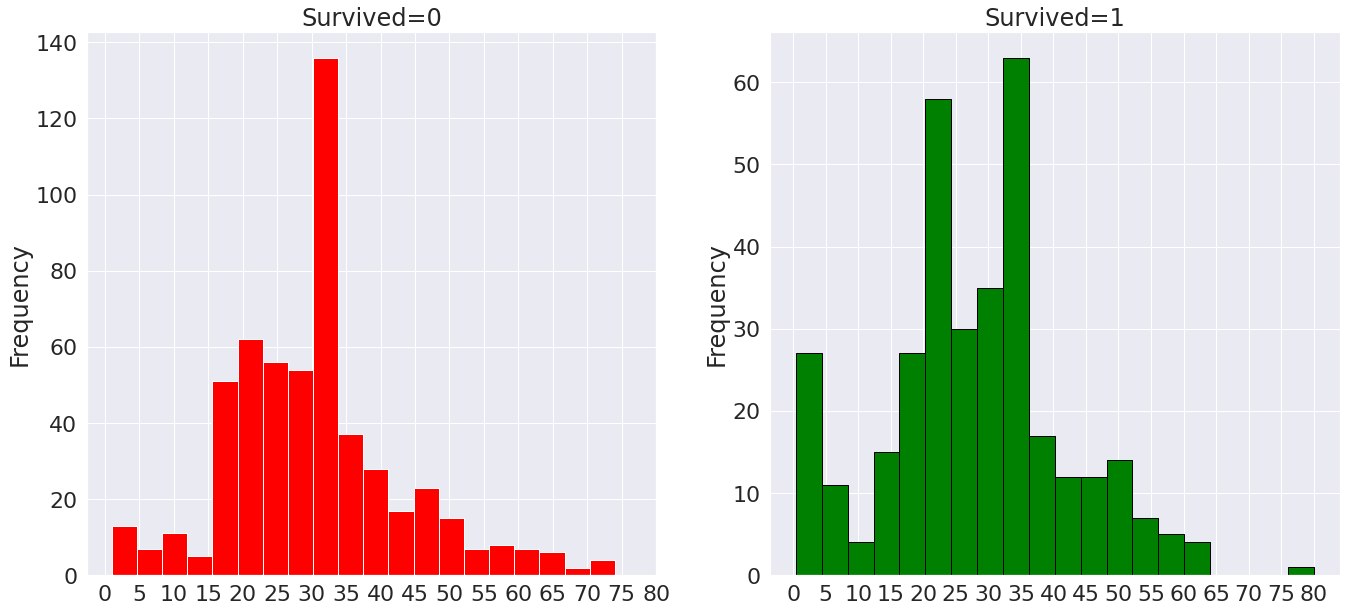

In [22]:
f, ax=plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='white', color='red')
ax[0].set_title('Survived=0')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

생존율 그래프를 보면 0-5세 사이의 생존율이 높아보입니다.  
그리고 나이가 높은 사람들이 사망율 보다 생존율이 높은 경향을 보입니다.  
빈먄에 30대 분들의 사망율이 높은 모습을 볼 수 있습니다.  

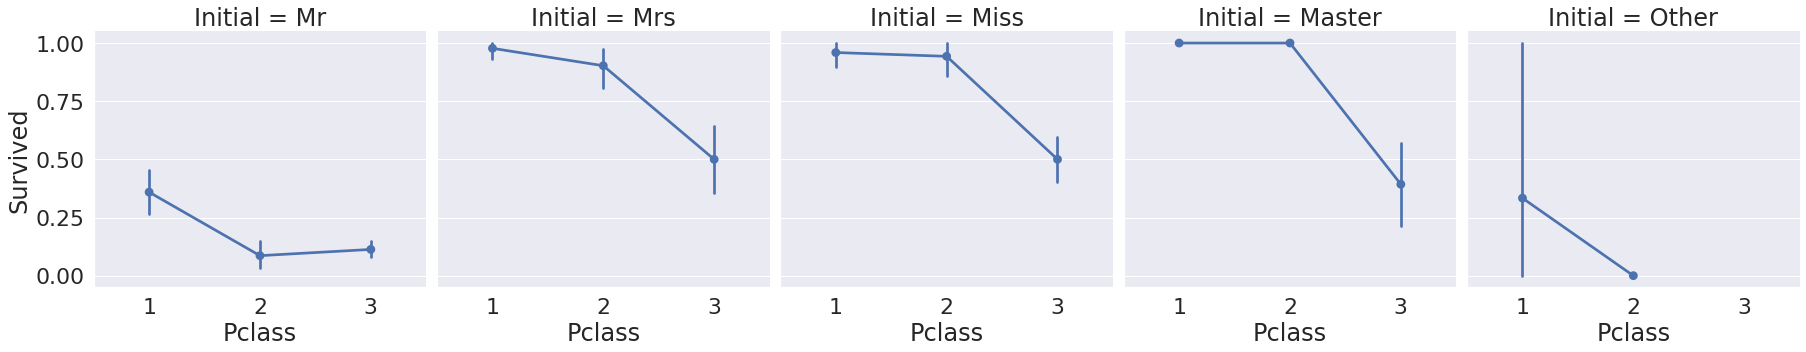

In [23]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

역시 여성들과 아이들의 생존율이 더 높은 경향을 확인 할 수 있습니다.  

### Embarked--> Categorical Value

In [24]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], 
            margins=True).style.background_gradient(cmap='Blues')
                                                                                                           

위의 그래프는 [탑승구, 객실등급]을 행으로 [성별, 생존율]을 열로 두고 관계를 보여주는 그래프이다.  
색의 변화를 통해 칼럼 사이의 관계를 눈으로 확인 할 수 있다.

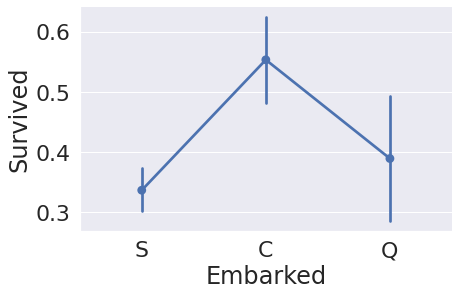

In [25]:
sns.factorplot('Embarked', 'Survived', data=data)
fig=plt.gcf()
fig.set_size_inches(7, 4)
plt.show()

C 항구의 생존률이 굉장히 높아보입니다.  
이유가 뭘까요? 

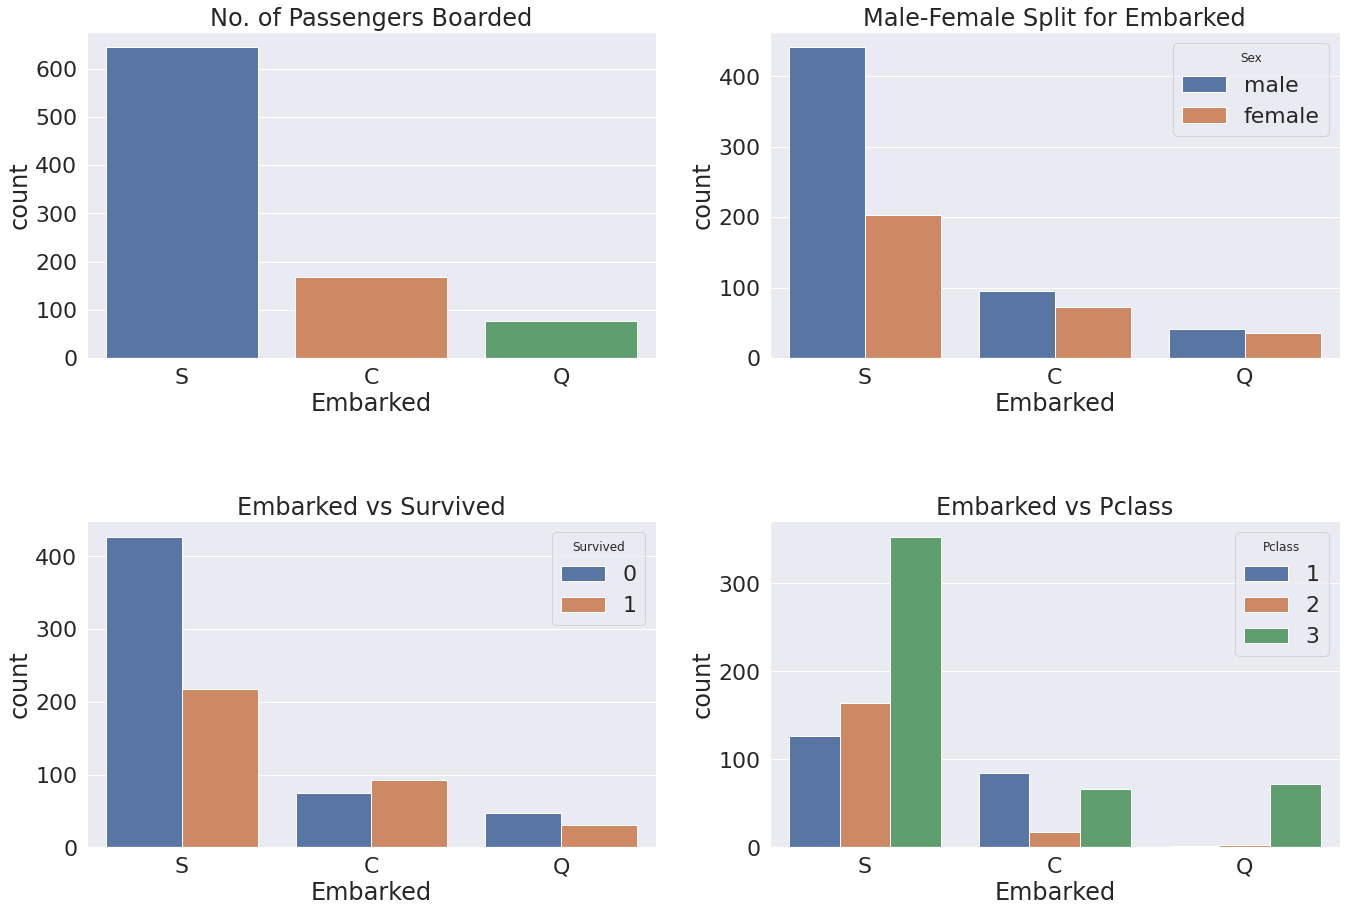

In [26]:
f, ax=plt.subplots(2,2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

탑승구에 따라 생존률이 변하는 모습이 궁금해서 4개의 그래프를 그렸습니다.  
1. 탑승구당 사람의 수
2. 탑승구의 남녀 분포
3. 탑승구당 생존 확률
4. 탑승구의 Pclass 분포

우선 S탑승구에 사람이 가장 많습니다. 그리고 사망률 또한 엄청 높게 나옵니다.  
S탑승구에는 남성이 많고 third 클래스가 압도적으로 많기 때문에   
사망률이 더 많은 것 같네요.  
반대로 C탑승구에는 first 클래스가 가장 많습니다.  
그래서 생존률이 더 높을 수 밖에 없는 것 같습니다.  
그리고 Q탑승구에는 third 클래스가 95%정도 있는 것을 확인했습니다.

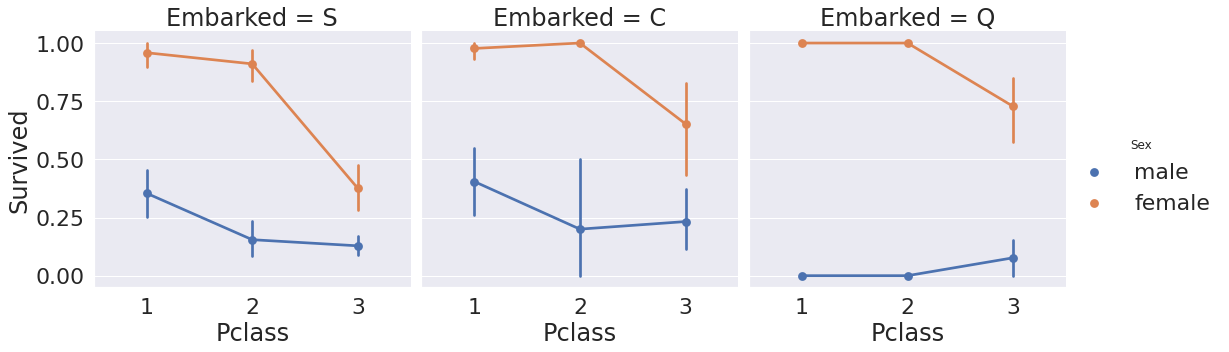

In [27]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

factorplot으로 보니 더욱 명확해지는 것 같습니다.  
여기서 seaborn의 그래프 사용법을 살짝 설명하겠습니다.  
'Pclass'와 'Survived'는 각각 x축, y축에 사용됩니다.  
**hue** 파라미터로 그래프의 개수가 결정되는 것 같습니다.  
범주(legend)로 나타나지고 오른쪽에 정리되어있네요.  
**col**파라미터는 여러개의 박스를 생성합니다.  

그래프를 해석해보면 남자의 생존률이 대부분 낮음을 확인할 수 있습니다.  
1. Pclass와 상관없이 1, 2 클래스 여자의 생존률은 거의 1에 가깝습니다.  
2. S 탑승구에는 여자, 남자 모두 다른 탑승구에 비해 생존률이 낮아서 전체적인 생존률이 낮아보입니다.  
3. Q 탑승구에서는 남자의 생존률이 희박합니다. 그 이유는 Pclass 3이기 때문입니다.

### Filling Embarked NaN

Port S에 사람이 가장 많음으로 NaN을 S로 바꾸겠습니다.

In [28]:
data['Embarked'].fillna('S', inplace=True)

In [29]:
data.Embarked.isnull().any()

False

### SibSip-->Discrete Feature

이 feature은 그 사람이 가족이 있는지 아니면 혼자인지 나타냅니다.

- Sibiling = 형, 누나, 동생
- Spouse = 남편, 아내

In [30]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='Blues')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


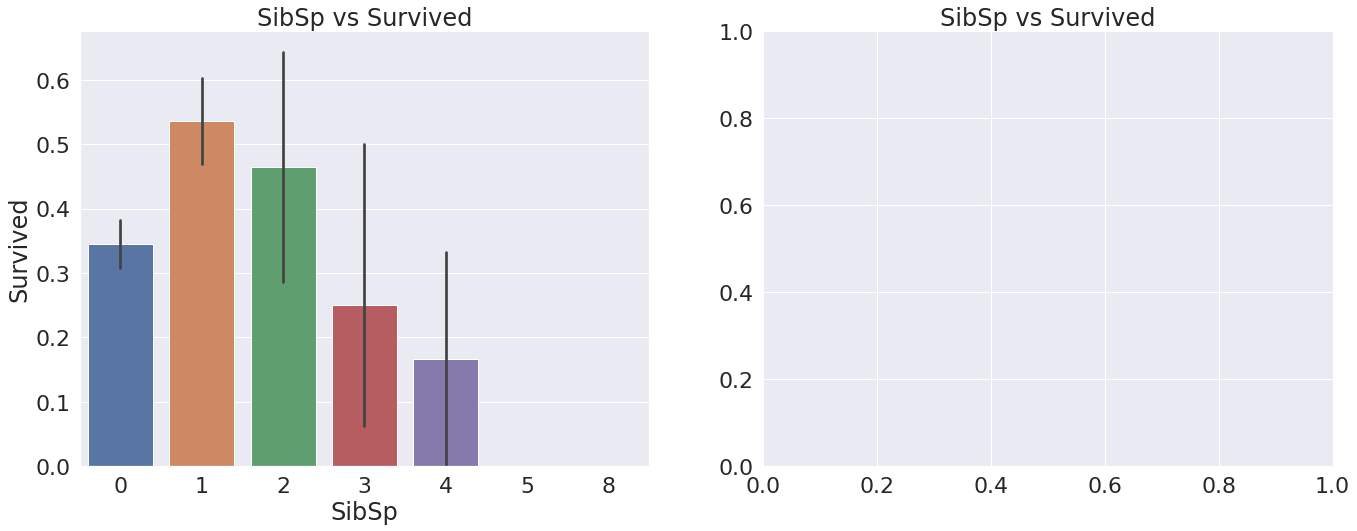

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

혼자만 있을 때는 생존률이 대략 34.5%입니다.  
그리고 가족이 1, 2명 더 있으면 생존률이 대략 늘어나지만, 
3, 4 명이 되면 더 줄어들게 됩니다.  
그 이유는 아마 서로 구하다가 사고를 당하는 것 같습니다.  
근데 5, 8명 생존률이 0입니다. 왜 그럴까요?  

In [32]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


그 이유는 Pclass에서 찾을 수 있습니다.  
가족이 4, 5, 8명은 third 클래스만 있습니다.  
앞서 우리는 third 클래스의 생존률이 처참하게 낮았던 모습을 보았습니다.  
그러니 당연히 생존율이 낮을 수 밖에 없습니다.  
즉, 가족수의 영향보단 클래스의 영향이 커보입니다.

### Parch

Parch는 함께 탑승한 부모, 자녀 수의 총합입니다.  
형제, 아내와 다른 결과를 보이는지 확인해봅시다!

In [33]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


그래프를 보면 가족수가 많을 수록 Pclass 3이 더 많이 보이는 군요.

Text(0.5, 1.0, 'Parch vs Survived')

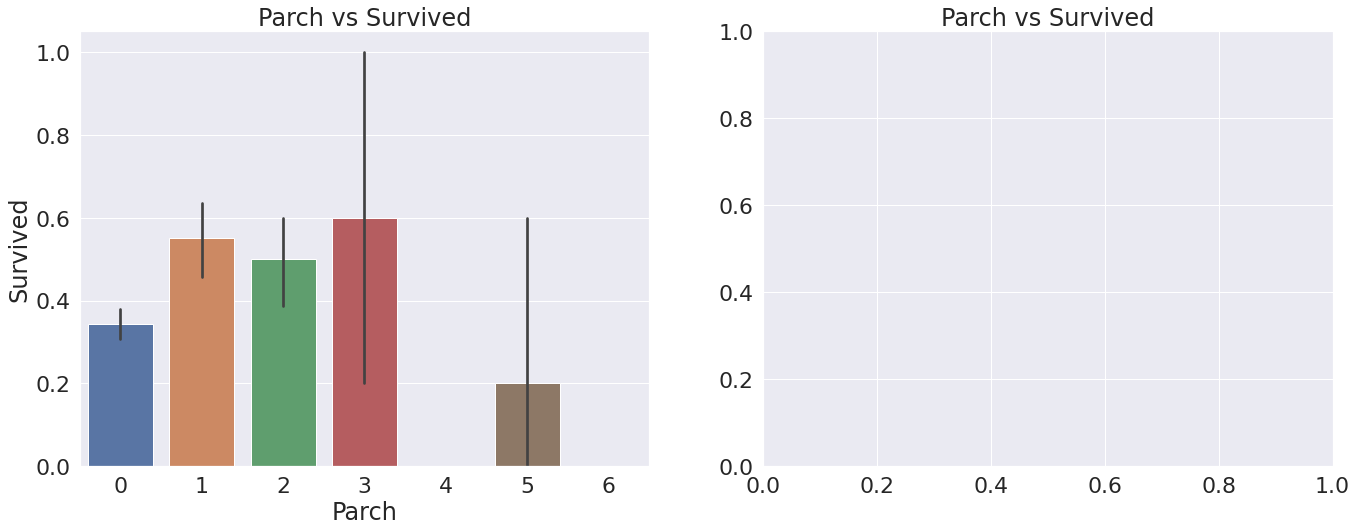

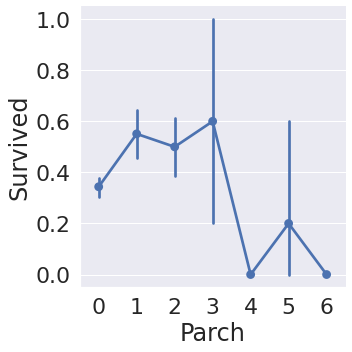

In [34]:
f, ax= plt.subplots(1, 2, figsize=(20,8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title("Parch vs Survived")
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

부모 or 자녀가 1-3명 일 때 가장 생존율이 높습니다.  
혼자 있을 때는 생존률이 50%도 안되는 걸로 보아 위험한 것 같습니다.  
하지만 4명 이상이 되면 생존률이 급격히 낮아집니다.  
이것도 Pclass의 영향인 것 같습니다.  

### Fare--> Continous Feature

탑승 요금에 따라 생존률이 어떻게 달라지는 지 알아보겠습니다. 

In [35]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


최소 요금은 0.0입니다.  
공짜로 타이타닉이라는 호화로운 여객선에 탑승한 셈입니다!

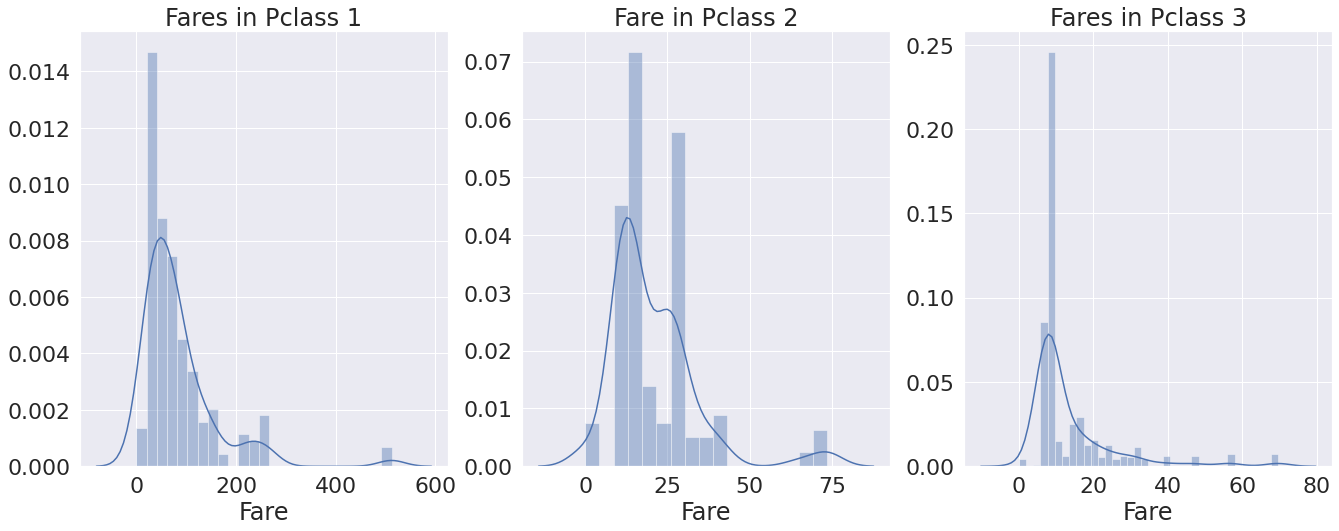

In [36]:
f, ax = plt.subplots(1, 3, figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fare in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

그래프를 보니까 분포가 너무 커보입니다.  
그리고 이런 분포는 표준이 감소함에 따라 줄어들게 됩니다.  
연속적인 값은 Binning(구간으로 나누어 범주화)로 처리할 수 있습니다. 

**전체적으로 feature을 정리해봅시다.**  
1. Sex: 남자보다 여자의 생존 확률이 더 커보입니다.  
2. Pclass: Class의 숫자가 낮아질수록 (1->2->3) 생존률이 점점 낮아집니다.  
3. Age: 5-10살 정도의 생존률이 가장 높고 15-35살은 사망률이 많습니다.  
4. Embarked: C 탑승구의 생존률이 가장 높습니다. S 탑승구에는 3rd class가 많은 만큼 사망률도 높습니다.  
5. Parch+SibSp: 1-2명의 가족과 같이 탑승 했을 때 가장 생존률이 높은 경향을 보입니다.  

### Correlation Between The Features

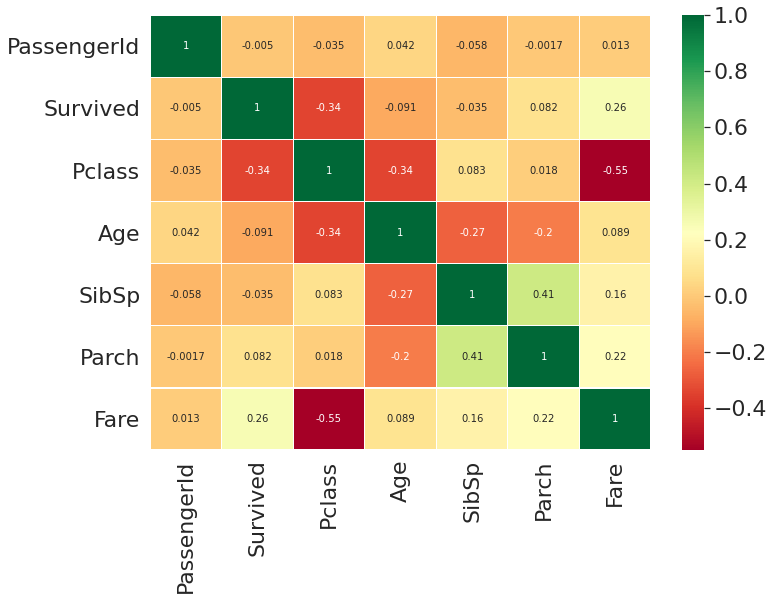

In [37]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Interpreting The Heatmap 

해석 보류

The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.

# Part2: Feature Engineering and Data Cleaning

Feature Engineering이란 무엇일까?  
우리에게 주어진 데이터는 항상 꼭 중요한 특징들만 가지고 있는 것은 아닙니다.  
제거해야할 필요가 있는 불필요한 데이터들도 많습니다.  
또한 우리는 다른 frature들에서 탐색하거나 추출해서 새로운 feature을 얻을 수도 있습니다.  

예를 들면 Name Feature를 사용해서 Initial feature을 얻는 것입니다.  

### Age_band

Problem With Age Feature:  
앞서 Age가 continous feature라는 사실을 알았습니다. 하지만 머신러닝 Models에서의 Continous Variables는 조금 문제가 있습니다.  
만약 스포츠인을 남성, 여성으로 구분한다면 쉽게 할 수 있을 것이빈다.  
하지만 나이가 서로 다른 30명이 존재할 때 연령으로 스포츠인을 구분한다면? 너무나 많은 범주로 구별 될 수 있습니다. 아마 그 수가 늘어날수록 문제는 더욱 커질 것 입니다.   
이러한 continous 값은 Binning 또는 Normalization을 통해 범주로 나눠줘야합니다.  
이번에는 Binning을 사용해서 구분 할 것입니다.  
즉, 연령을 특정 기준으로 그룹화 할 것입니다. 

In [38]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [39]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


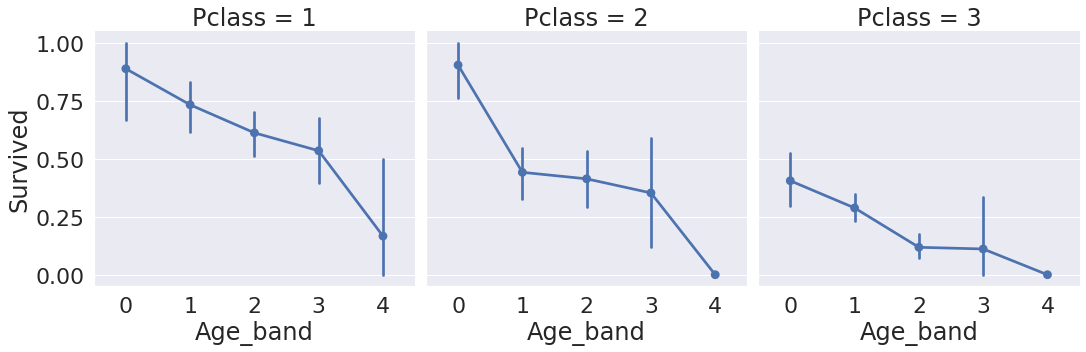

In [40]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

사실 Pclass와 관계 없이 나이가 들수록 생존 확률이 떨어집니다..

### Family_Size and Alone 

중요한 것은 우리가 'Family size' 와 'Alone'과 같은 새로운 feature을 만들 수 있다는 것입니다.   
이 feature은 Parch와 SibSp를 합한 값입니다. (가족인데 분류하는 게 이상하긴 했음..)  
우리는 이 두개의 feature를 합함으로 써 가족 구성원의 수와 생존률의 관계를 확인 할 수 있습니다.  
'Alone'은 승객이 혼자인지 혼자가 아닌지를 나타냅니다.  

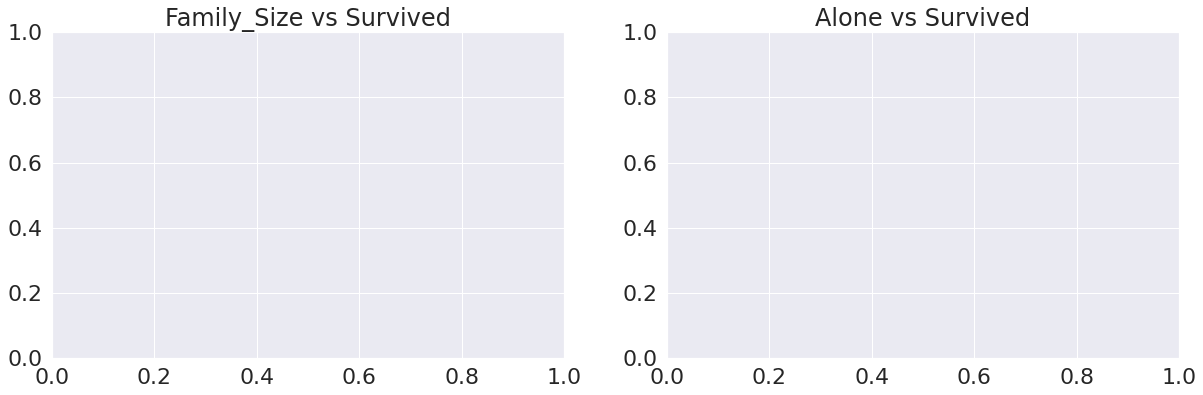

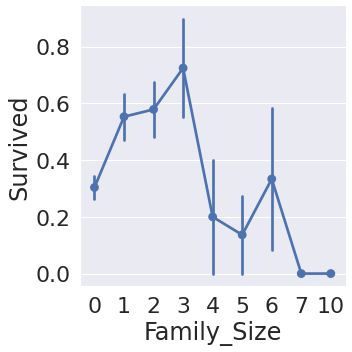

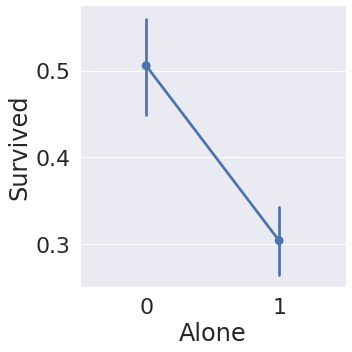

In [48]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch']+data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1

f, ax= plt.subplots(1, 2, figsize=(18,6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title("Family_Size vs Survived")
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.show()

혼자만 있을 때 생존확률이 엄청 낮다는 사실을 명확하게 알게되었습니다.   
가족이 (나포함) 4명이 있을 때가 가장 생존률이 높게 나왔습니다.  

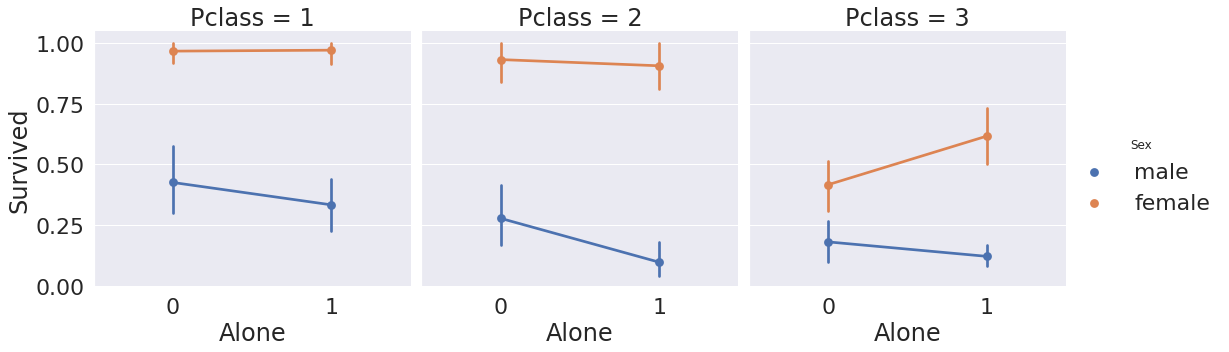

In [49]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

여성은 혼자든 가족이 있던 Pclass 1, 2에서는 생존률이 거의 1에 가깝군요.  
하지만 Pclass 3에서는 대부분 생존 확률이 낮은 걸로 확인 되었습니다.  

### Fare_Range

요금 또한 continous feature입니다. 우리는 ordinal value로 바꿔줄 필요가 있습니다.  
우리는 그래서 pandas.qcut 함수를 사용하겠습니다.  
qcut는 우리가 설정한 bin의 수에 따라 값을 분할 하거나 배열합니다.  
만약 우리가 5를 bin으로 설정했다면 5개로 나누어줍니다.  

In [50]:
data['Fare_Range']=pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 말한 것과 같이, 우리는 지불한 요금이 올라가는 것과 비례해서 생존률도 올라가는 사실을 확인했습니다.  
Fare_Range를 그대로 전달 할 수 없습니다. 우리는 Age_Band에서와 같이 singleton values로 바꿔줘야합니다.
(0, 1, 2, 3 과 같은 값으로 변경)

In [51]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

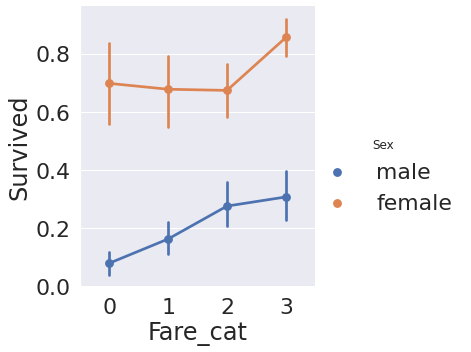

In [52]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

역시 요금이 증가 할수록 생존률도 증가하는 모습을 볼 수 있군요.  
이는 성별과 함께 중요한 요소로 자리합니다. 

### Converting String Values into Numeric